In [1]:
# qiskit module
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

# numerical module
import numpy as np
from math import pi

#setup plotting 
import matplotlib.pyplot as plt
plt.style.use('SciencePlots-APS.mplstyle')

In [2]:
def createB(qc, q, N, dt):
    for i in range (1, N-1, 2):
        qc.cx(q[i], q[i+1])
        qc.rx(-dt, q[i])
        qc.ry(-dt, q[i+1])
        qc.cx(q[i], q[i+1])

def createC(qc, q, N, dt):
    for i in range (0, N, 2):
        qc.cx(q[i], q[i+1])
        qc.rx(-2*dt, q[i])
        qc.ry(-2*dt, q[i+1])
        qc.cx(q[i], q[i+1])

def measure_z(qc, q, j):
    c = ClassicalRegister(1,"c") 
    qc.add_register(c)
    qc.measure(q[j],c[0])

def expectation_value(Nqubits, Nt):
    N = Nqubits
    dt = 0.1
    q = QuantumRegister(N, "q")
    qc = QuantumCircuit(q)
    
    for i in range(int(N/2), N):
        qc.x(q[i])
    
    qc.barrier()
    
    for i in range(Nt):   
        createB(qc, q, N, dt)
        createC(qc, q, N, dt)
        createB(qc, q, N, dt)
    
    qc.barrier()
    
    expectation_values = np.zeros(N)
    for j in range(N):
        qc_j = qc.copy()  # make a copy of qc for each measurement
        measure_z(qc_j, q, j)
        job = execute(qc_j, Aer.get_backend('qasm_simulator'), shots=1000)
        counts = job.result().get_counts(qc_j) 
        num_0 = counts.get('0', 0)
        num_1 = counts.get('1', 0)
        expectation_value = (num_0 - num_1) / 1000
        expectation_values[j] = expectation_value
    return expectation_values

## 6 qubits

In [3]:
Nqubit = 6
Nt = np.linspace(1, 20, 20)

measurement = np.array([expectation_value(Nqubit, int(x)) for x in Nt])

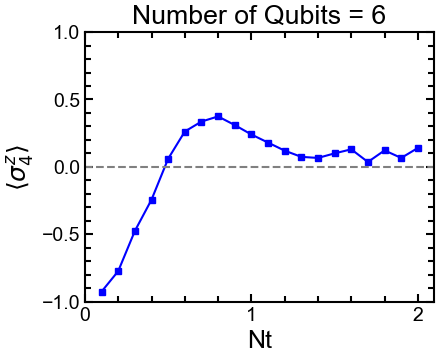

In [4]:
# plotting
fig = plt.figure(figsize=(4.5, 3.5))

plt.plot(Nt*0.1, measurement[:, 3], '-s', color='blue')
# X-axis
plt.xlabel('Nt')
plt.xticks([0.0, 1.0,  2.0])
# Y-axis
plt.ylabel(r'$\langle \sigma^{z}_{4}\rangle$')
plt.yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
plt.axhline(0.0, color='gray', ls='--')

plt.title('Number of Qubits = {}'.format(Nqubit))
fig.savefig('./sigma_z_{}.png'.format(Nqubit), dpi=600)
plt.show()

## 8 qubits

In [5]:
Nqubit = 8
Nt = np.linspace(1, 20, 20)

measurement = np.array([expectation_value(Nqubit, int(x)) for x in Nt])

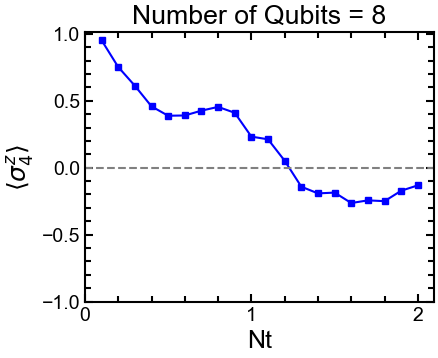

In [6]:
# plotting
fig = plt.figure(figsize=(4.5, 3.5))

plt.plot(Nt*0.1, measurement[:, 3], '-s', color='blue')
# X-axis
plt.xlabel('Nt')
plt.xticks([0.0, 1.0,  2.0])
# Y-axis
plt.ylabel(r'$\langle \sigma^{z}_{4}\rangle$')
plt.yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
plt.axhline(0.0, color='gray', ls='--')

plt.title('Number of Qubits = {}'.format(Nqubit))
fig.savefig('./sigma_z_{}.png'.format(Nqubit), dpi=600)
plt.show()

## 10 qubits

In [7]:
Nqubit = 10
Nt = np.linspace(1, 20, 20)

measurement = np.array([expectation_value(Nqubit, int(x)) for x in Nt])

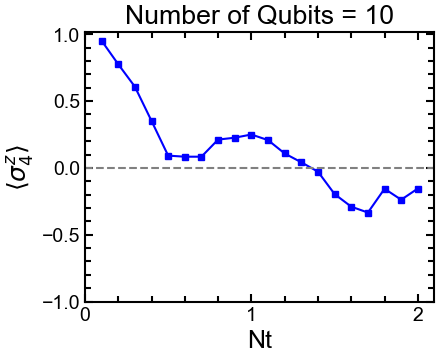

In [8]:
# plotting
fig = plt.figure(figsize=(4.5, 3.5))

plt.plot(Nt*0.1, measurement[:, 3], '-s', color='blue')
# X-axis
plt.xlabel('Nt')
plt.xticks([0.0, 1.0,  2.0])
# Y-axis
plt.ylabel(r'$\langle \sigma^{z}_{4}\rangle$')
plt.yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
plt.axhline(0.0, color='gray', ls='--')

plt.title('Number of Qubits = {}'.format(Nqubit))
fig.savefig('./sigma_z_{}.png'.format(Nqubit), dpi=600)
plt.show()